In [276]:
# Import the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

# Import the data
first_dataset = pd.read_csv('Labelled Financial News.csv')
second_dataset = pd.read_csv('all-data.csv', encoding="iso-8859-1")



In [277]:
first_dataset.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [278]:
second_dataset.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [279]:
# Need to rename the columns in the second dataset
second_dataset.columns = ['Sentiment', 'Sentence']

second_dataset.head()

,Sentiment,Sentence
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [280]:
# Need to combine the two datasets into one
combined_dataset = pd.concat([first_dataset, second_dataset], ignore_index=True)

# Swap the columns around so that sentiment is the first column
cols = combined_dataset.columns.tolist()
cols = cols[-1:] + cols[:-1]
combined_dataset = combined_dataset[cols]

combined_dataset

,Sentiment,Sentence
0,positive,The GeoSolutions technology will leverage Bene...
1,negative,"$ESI on lows, down $1.50 to $2.50 BK a real po..."
2,positive,"For the last quarter of 2010 , Componenta 's n..."
3,neutral,According to the Finnish-Russian Chamber of Co...
4,neutral,The Swedish buyout firm has sold its remaining...
...,...,...
10682,negative,LONDON MarketWatch -- Share prices ended lower...
10683,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
10684,negative,Operating profit fell to EUR 35.4 mn from EUR ...
10685,negative,Net sales of the Paper segment decreased to EU...


In [281]:
# Save the combined dataset
combined_dataset.to_csv('combined_dataset.csv', index=False)

In [282]:
!pip install Sentenceblob

ERROR: Could not find a version that satisfies the requirement Sentenceblob (from versions: none)
ERROR: No matching distribution found for Sentenceblob


In [283]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

import pickle

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

k=KNeighborsClassifier()
d=DecisionTreeClassifier()
r=RandomForestClassifier()
l=LogisticRegression()
mb=MultinomialNB()
    
from sklearn.model_selection import train_test_split

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

from textblob import TextBlob

import warnings
warnings.filterwarnings('ignore')  

In [284]:
combined_dataset['Sentiment'].value_counts()

Sentiment
neutral     6008
positive    3215
negative    1464
Name: count, dtype: int64

In [285]:
from sklearn.preprocessing import LabelEncoder

# Encode sentiment labels
label_encoder = LabelEncoder()
combined_dataset['Sentiment'] = label_encoder.fit_transform(combined_dataset['Sentiment'])

combined_dataset

,Sentiment,Sentence
0,2,The GeoSolutions technology will leverage Bene...
1,0,"$ESI on lows, down $1.50 to $2.50 BK a real po..."
2,2,"For the last quarter of 2010 , Componenta 's n..."
3,1,According to the Finnish-Russian Chamber of Co...
4,1,The Swedish buyout firm has sold its remaining...
...,...,...
10682,0,LONDON MarketWatch -- Share prices ended lower...
10683,1,Rinkuskiai 's beer sales fell by 6.5 per cent ...
10684,0,Operating profit fell to EUR 35.4 mn from EUR ...
10685,0,Net sales of the Paper segment decreased to EU...


In [286]:
combined_dataset["Sentiment"].value_counts()

df = combined_dataset

In [287]:
def preprocess_data(input_df):
    result_df = input_df.copy()
    result_df["Sentence"]=result_df["Sentence"].str.lower() #We convert our Sentences to lowercase.
    result_df["Sentence"]=result_df["Sentence"].str.replace("[^\w\s]","") #We remove punctuation marks from our Sentences.
    result_df["Sentence"]=result_df["Sentence"].str.replace("\d+","") #We are removing numbers from our Sentences.
    result_df["Sentence"]=result_df["Sentence"].str.replace("\n","").replace("\r","") #We remove spaces in our Sentences.
    result_df_Sentiment=result_df[result_df['Sentiment']=="Sentiment"]
    result_df_positive=result_df[result_df['Sentiment']=="positive"]
    result_df_negative=result_df[result_df['Sentiment']=="negative"]
    # df["Sentiment"]=df["Sentiment"].map({"positive":1,"negative":0,"Sentiment":2})
    # df['Sentiment']=df['Sentiment'].astype(int)
    df1=result_df[df['Sentiment']!=1]
    #We divide it into positive and negative.
    # Change all of the sentiment valuea that are 2 to 1
    df1["Sentiment"]=df1["Sentiment"].replace(2,1)
    
    return df1

In [288]:
df1 = preprocess_data(df)
df1

,Sentiment,Sentence
0,1,the geosolutions technology will leverage bene...
1,0,"$esi on lows, down $1.50 to $2.50 bk a real po..."
2,1,"for the last quarter of 2010 , componenta 's n..."
5,1,$spy wouldn't be surprised to see a green close
6,0,shell's $70 billion bg deal meets shareholder ...
...,...,...
10681,0,helsinki thomson financial - shares in cargote...
10682,0,london marketwatch -- share prices ended lower...
10684,0,operating profit fell to eur 35.4 mn from eur ...
10685,0,net sales of the paper segment decreased to eu...


In [292]:
# vect=CountVectorizer(lowercase=True,stop_words="english")
x=df1.Sentence
y=df1.Sentiment
# x=CountVectorizer(lowercase=True,stop_words="english").fit_transform(x)

In [295]:
def sentiment_classification_funct(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=60)


    # Algorithms to be used in pipelines
    algos = [KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression(), MultinomialNB()]
    algo_names = ['KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', 'LogisticRegression', 'MultinomialNB']

    accuracy_scored = []
    precision_scored = []
    recall_scored = []
    f1_scored = []

    # Create a directory for models if it doesn't exist
    models_directory = "models"
    if not os.path.exists(models_directory):
        os.makedirs(models_directory)

    for algo, name in zip(algos, algo_names):
        # Create a pipeline
        pipeline = Pipeline([
            ('vect', CountVectorizer(lowercase=True, stop_words='english')),
            ('clf', algo)
        ])

        # Fit the pipeline
        pipeline.fit(x_train, y_train)
        y_pred = pipeline.predict(x_test)

        # Evaluation Metrics
        accuracy_scored.append(accuracy_score(y_test, y_pred))
        precision_scored.append(precision_score(y_test, y_pred))
        recall_scored.append(recall_score(y_test, y_pred))
        f1_scored.append(f1_score(y_test, y_pred))

        # Print classification report
        print(f"Classification Report for {name}:")
        print(classification_report(y_test, y_pred))

        # Confusion Matrix
        cf_matrix = confusion_matrix(y_test, y_pred)
        categories = ['Negative', 'Positive']
        sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', 
                    xticklabels=categories, yticklabels=categories)
        plt.title(f"Confusion Matrix for {name}")
        plt.xlabel("Predicted values")
        plt.ylabel("Actual values")
        plt.show()

        # Save the pipeline
        with open(os.path.join(models_directory, name + '_pipeline.pkl'), 'wb') as file:
            pickle.dump(pipeline, file)

    result = pd.DataFrame(columns=['f1_score', 'recall_score', 'precision_score', 'accuracy_score'], index=algo_names)
    result.f1_score = f1_scored
    result.recall_score = recall_scored
    result.precision_score = precision_scored
    result.accuracy_score = accuracy_scored
    return result.sort_values('f1_score', ascending=False)

In [296]:
x

0        the geosolutions technology will leverage bene...
1        $esi on lows, down $1.50 to $2.50 bk a real po...
2        for the last quarter of 2010 , componenta 's n...
5          $spy wouldn't be surprised to see a green close
6        shell's $70 billion bg deal meets shareholder ...
                               ...                        
10681    helsinki thomson financial - shares in cargote...
10682    london marketwatch -- share prices ended lower...
10684    operating profit fell to eur 35.4 mn from eur ...
10685    net sales of the paper segment decreased to eu...
10686    sales in finland decreased by 10.5 % in januar...
Name: Sentence, Length: 4679, dtype: object

Classification Report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.62      0.41      0.49       287
           1       0.77      0.89      0.83       649

    accuracy                           0.74       936
   macro avg       0.69      0.65      0.66       936
weighted avg       0.72      0.74      0.72       936



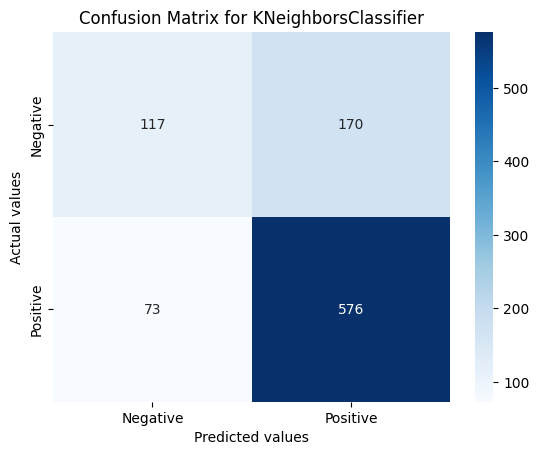

Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       287
           1       0.91      0.91      0.91       649

    accuracy                           0.88       936
   macro avg       0.86      0.86      0.86       936
weighted avg       0.88      0.88      0.88       936



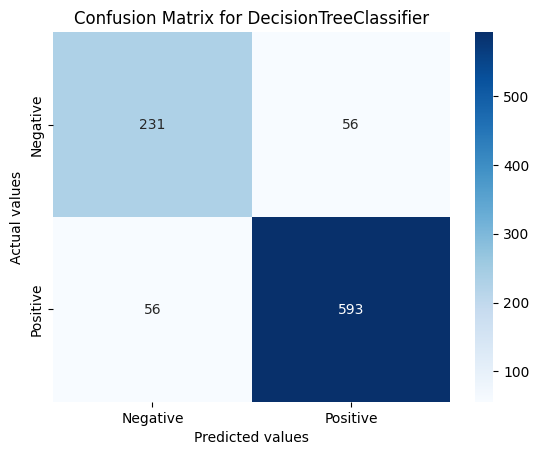

Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.92      0.75      0.83       287
           1       0.90      0.97      0.93       649

    accuracy                           0.90       936
   macro avg       0.91      0.86      0.88       936
weighted avg       0.90      0.90      0.90       936



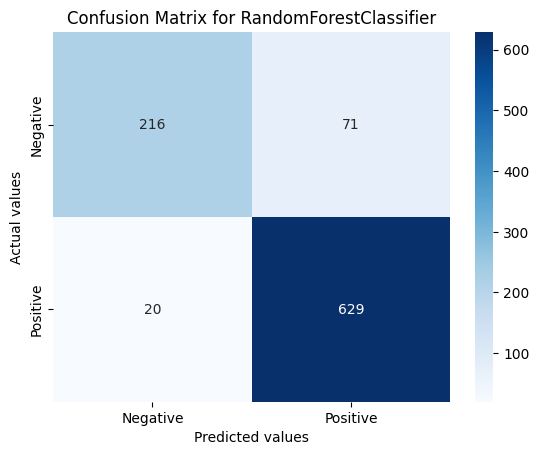

Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       287
           1       0.91      0.95      0.93       649

    accuracy                           0.90       936
   macro avg       0.89      0.87      0.88       936
weighted avg       0.90      0.90      0.90       936



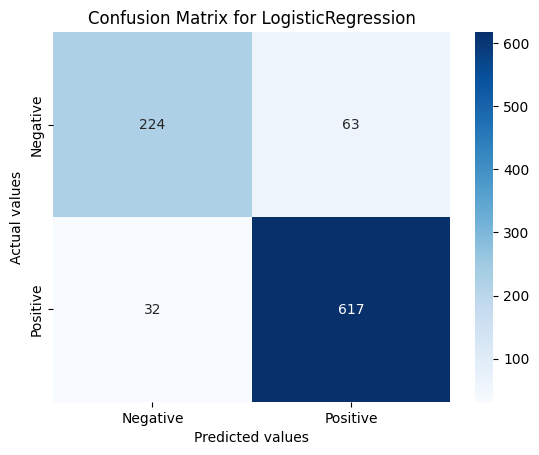

Classification Report for MultinomialNB:
              precision    recall  f1-score   support

           0       0.72      0.77      0.74       287
           1       0.89      0.87      0.88       649

    accuracy                           0.84       936
   macro avg       0.81      0.82      0.81       936
weighted avg       0.84      0.84      0.84       936



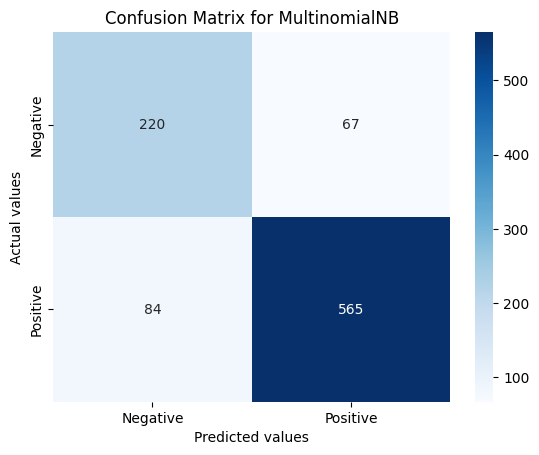

In [297]:
results = sentiment_classification_funct(x, y)

In [298]:
results

,f1_score,recall_score,precision_score,accuracy_score
RandomForestClassifier,0.932543,0.969183,0.898571,0.902778
LogisticRegression,0.928518,0.950693,0.907353,0.898504
DecisionTreeClassifier,0.913713,0.913713,0.913713,0.880342
MultinomialNB,0.882123,0.870570,0.893987,0.838675
KNeighborsClassifier,0.825806,0.887519,0.772118,0.740385
